In [75]:
from IPython import display

# Práctica 1 - Periódico El País
La práctica consistirá en utilizar el módulo *requests* y *Beautiful Soup 4* para extraer las noticias más relevantes de la sección de destacados del <a href="https://elpais.com/" target="_blank">periódico online El País</a>.

El programa, deberá extraer el título y el subtítulo de cada una de las noticias y almacenarlas en formato tabular utilizando la librería *pandas*. También, se deberá incluir la fecha en la que se realiza la extracción y el *url* de la noticia.

Por último, los datos obtenidos se tendrán que guardar en un fichero con formato JSON y 4 espacios de identación con el siguiente nombre: "YYYYMMDD_noticias_destacadas_el_pais.json".

En un módulo adicional de esta práctica, no solo se almacenará la información detallada anteriormente sino, también, cualquier información que esté disponible para una noticia en concreto (autor, lugar, número de comentarios, etc.)

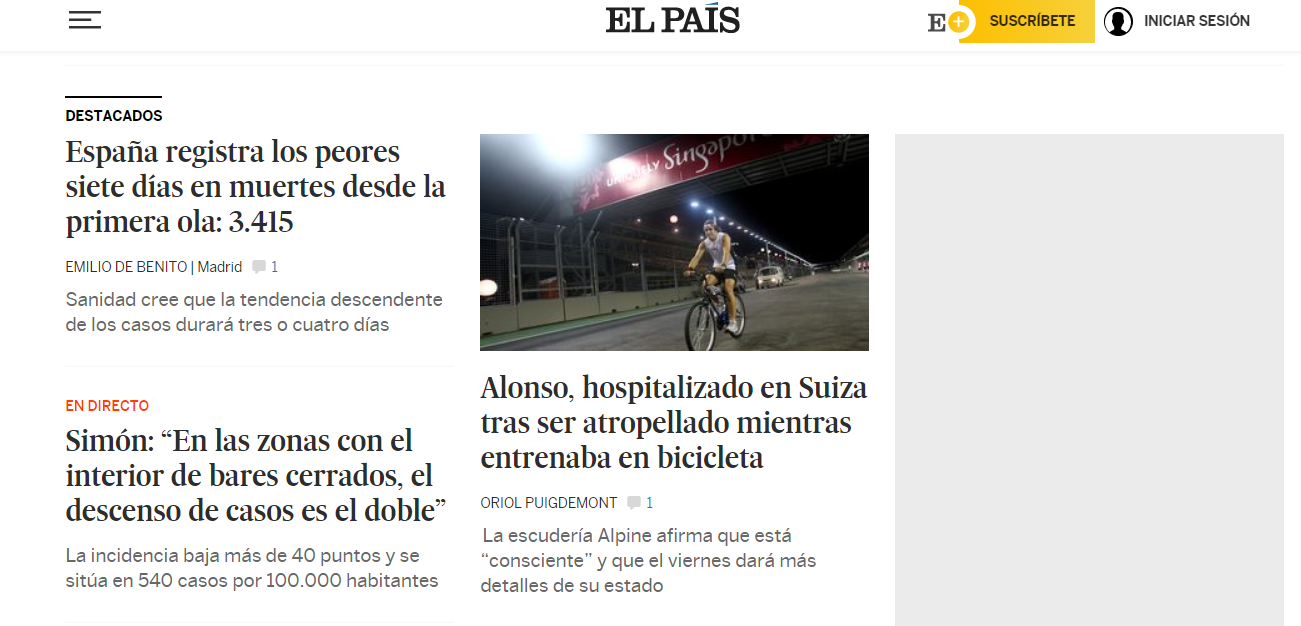

In [76]:
display.Image("el_pais.png")

In [77]:
import os
import time
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import json
import numpy as np
import pandas as pd

In [78]:
URL = "https://elpais.com"

In [79]:
try:
    res = requests.get(URL)
    if res.status_code != 200:
        raise Exception("No se pudo realizar la conexión")
except:
    print("No existe la dirección web")

In [80]:
res.text

'<!DOCTYPE html><html lang="es"><head><title>EL PAÍS: el periódico global</title><meta name="lang" content="es"/><meta name="author" content="Ediciones El País"/><meta name="robots" content="index,follow"/><meta name="description" content="Noticias de última hora sobre la actualidad en España y el mundo: política, economía, deportes, cultura, sociedad, tecnología, gente, opinión, viajes, moda, televisión, los blogs y las firmas de EL PAÍS. Además especiales, vídeos, fotos, audios, gráficos, entrevistas, promociones y todos los servicios de EL PAÍS."/><meta http-equiv="Refresh" content="900"/><meta name="organization" content="Ediciones EL PAÍS S.L."/><meta property="article:publisher" content="https://www.facebook.com/elpais/"/><meta property="og:title" content="EL PAÍS: el periódico global"/><meta property="og:description" content="Noticias de última hora sobre la actualidad en España y el mundo: política, economía, deportes, cultura, sociedad, tecnología, gente, opinión, viajes, moda

In [81]:
soup = BeautifulSoup(res.text, 'html.parser')

In [82]:
div_column_1 = soup.find("div", class_="first_column | col desktop_4 tablet_4 mobile_4")

In [83]:
soup.find("div", class_="first_column | col desktop_4 tablet_4 mobile_4")

<div class="first_column | col desktop_4 tablet_4 mobile_4"><article class="c story_card c__d story_card_default | flex flex_wrap align_content_start c--f story_photo c--rel story_related"><figure class="f story_card_image | block margin_bottom_xs width_full"><a class="image_link | width_full block relative" href="/espana/elecciones-catalanas/2021-02-19/erc-asegura-que-el-nuevo-govern-rehuira-la-via-independentista-unilateral.html"><img alt="Pere Aragonès (izquierda) y Oriol Junqueras, en la noche electoral." class="block width_full breakout_mobile" src="https://imagenes.elpais.com/resizer/zcjSYimwROhzqyb8VI88xDwaCdo=/62x34/filters:focal(1398.3333333333335x818.3333333333334:1408.3333333333335x828.3333333333334)/cloudfront-eu-central-1.images.arcpublishing.com/prisa/37KSGLIDY5PLJS6HP54T557JUA.jpg"/></a><figcaption class="f_c | color_gray_medium_alt text_align_right"><span>Aragonès y Junqueras, en la noche electoral.</span><span class="f_a credits | color_gray_dark margin_left_half upper

In [84]:
div_column_1.find_all("article")

[<article class="c story_card c__d story_card_default | flex flex_wrap align_content_start c--f story_photo c--rel story_related"><figure class="f story_card_image | block margin_bottom_xs width_full"><a class="image_link | width_full block relative" href="/espana/elecciones-catalanas/2021-02-19/erc-asegura-que-el-nuevo-govern-rehuira-la-via-independentista-unilateral.html"><img alt="Pere Aragonès (izquierda) y Oriol Junqueras, en la noche electoral." class="block width_full breakout_mobile" src="https://imagenes.elpais.com/resizer/zcjSYimwROhzqyb8VI88xDwaCdo=/62x34/filters:focal(1398.3333333333335x818.3333333333334:1408.3333333333335x828.3333333333334)/cloudfront-eu-central-1.images.arcpublishing.com/prisa/37KSGLIDY5PLJS6HP54T557JUA.jpg"/></a><figcaption class="f_c | color_gray_medium_alt text_align_right"><span>Aragonès y Junqueras, en la noche electoral.</span><span class="f_a credits | color_gray_dark margin_left_half uppercase"><span class="author">AFP</span></span></figcaption></

### Características de una noticia

In [85]:
title = div_column_1.find_all("article")[0].h2.a.text
print(title)

ERC asegura que el nuevo Gobierno catalán rehuirá la vía independentista unilateral


In [86]:
suburl = div_column_1.find_all("article")[0].h2.a['href']
print(suburl)

/espana/elecciones-catalanas/2021-02-19/erc-asegura-que-el-nuevo-govern-rehuira-la-via-independentista-unilateral.html


In [87]:
subtitle = div_column_1.find_all("article")[0].p.text
print(subtitle)

La portavoz de los republicanos aboga por un Ejecutivo anclado en la negociación y lanza un guiño a la CUP apostando por cambiar el modelo policial catalán


In [88]:
time = datetime.today().strftime("%Y%m%d")
print(time)

20210219


In [89]:
extract_columns = ["first_column | col desktop_4 tablet_4 mobile_4", "second_column | col desktop_4 tablet_4 mobile_4"]

In [90]:
times = []
titles = []
subtitles = []
urls = []

for c in extract_columns:
    div_column = soup.find("div", class_=c)
    for article in div_column.find_all("article"):
        time = datetime.today().strftime("%Y%m%d")
        times.append(time)
        title = article.h2.a.text
        titles.append(title)
        if article.p is not None:
            subtitle = article.p.text
        else:
            subtitle = ""
        subtitles.append(subtitle)
        url = URL + article.h2.a['href']
        urls.append(url)

data = {
        "time": times,
        "title": titles,
        "subtitle": subtitles,
        "url": urls
        }

In [93]:
df = pd.DataFrame(data=data)
df

,time,title,subtitle,url
0,20210219,ERC asegura que el nuevo Gobierno catalán rehu...,La portavoz de los republicanos aboga por un E...,https://elpais.com/espana/elecciones-catalanas...
1,20210219,Madrid acelera la desescalada pese a ser la co...,La Comunidad mantendrá las limitaciones en un ...,https://elpais.com/espana/madrid/2021-02-19/ma...
2,20210219,Pfizer anuncia que su vacuna puede almacenarse...,"El fármaco se conserva entre -25 °C y -15 °C, ...",https://elpais.com/sociedad/2021-02-19/ultimas...
3,20210219,Golpe a Uber en el Reino Unido: el Tribunal Su...,La sentencia señala que la compañía intentó es...,https://elpais.com/economia/2021-02-19/golpe-a...
4,20210219,Muere una joven herida de bala durante las pro...,"Mya Thwe Thwe Khaing, de 20 años, es la primer...",https://elpais.com/internacional/2021-02-19/mu...
5,20210219,"Acciona pagó a su presidente 36,61 millones en...",La remuneración total de José Manuel Entrecana...,https://elpais.com/economia/2021-02-19/acciona...
6,20210219,Biden proyecta dar la nacionalidad a 11 millon...,La Administración demócrata presenta en el Con...,https://elpais.com/internacional/2021-02-18/bi...
7,20210219,La Audiencia Nacional niega la indemnización d...,Los jueces consideran que las Administraciones...,https://elpais.com/clima-y-medio-ambiente/2021...
8,20210219,La flota perdida de Francis Drake emerge en A ...,El estudio para el próximo dragado de la ría d...,https://elpais.com/cultura/2021-02-18/los-flot...
9,20210219,Estas son las leyes de igualdad que tensan a l...,El PSOE impulsa la norma por la no discriminac...,https://elpais.com/sociedad/2021-02-18/las-ley...


In [98]:
with open("data.json", "w") as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

In [72]:
with open("data.json", "r") as json_file:
    data_json = json.load(json_file)

## Refactoring

In [105]:
def get_html_soup(url):
    try:
        res = requests.get(url)
        if res.status_code != 200:
            raise Exception("No se pudo realizar la conexión")
    except:
        print("No existe la dirección web")
    return BeautifulSoup(res.text, 'html.parser')


def get_article_info(article):
    time = datetime.today().strftime("%Y%m%d")
    title = article.h2.a.text
    if article.p is not None:
        subtitle = article.p.text
    else:
        subtitle = ""
    url = URL + article.h2.a['href']
    return time, title, subtitle, url
    

def get_news(soup):
    # Initializations
    extract_columns = ["first_column | col desktop_4 tablet_4 mobile_4", "second_column | col desktop_4 tablet_4 mobile_4"]
    times = []
    titles = []
    subtitles = []
    urls = []
    # Get info from articles
    for c in extract_columns:
        div_column = soup.find("div", class_=c)
        for article in div_column.find_all("article"):
            time, title, subtitle, url = get_article_info(article)
            times.append(time)
            titles.append(title)
            subtitles.append(subtitle)
            urls.append(url)
    # Final dictionary
    data = {
        "time": times,
        "title": titles,
        "subtitle": subtitles,
        "url": urls
        }
    return data


def export_json_data(file_path, data):
    with open(file_path, "w") as json_file:
        json.dump(data, json_file, ensure_ascii=False, indent=4)

    
def main():
    URL = "https://elpais.com"
    FILE_PATH = "data.json"
    soup = get_html_soup(URL)
    data = get_news(soup)
    export_json_data(FILE_PATH, data)
    

In [106]:
main()